## Dataset Information


Boston House Prices Dataset was collected in 1978 and has 506 entries with 14 attributes or features for homes from various suburbs in Boston.

```
Boston Housing Dataset Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's
```

## Import modules

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Loading the dataset

In [59]:
df = pd.read_csv("Boston Dataset.csv")
df.drop(columns=['Unnamed: 0'], axis=0, inplace=True)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [60]:
# statistical info
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [61]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


## Preprocessing the dataset

In [62]:
# check for null values
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

## Exploratory Data Analysis

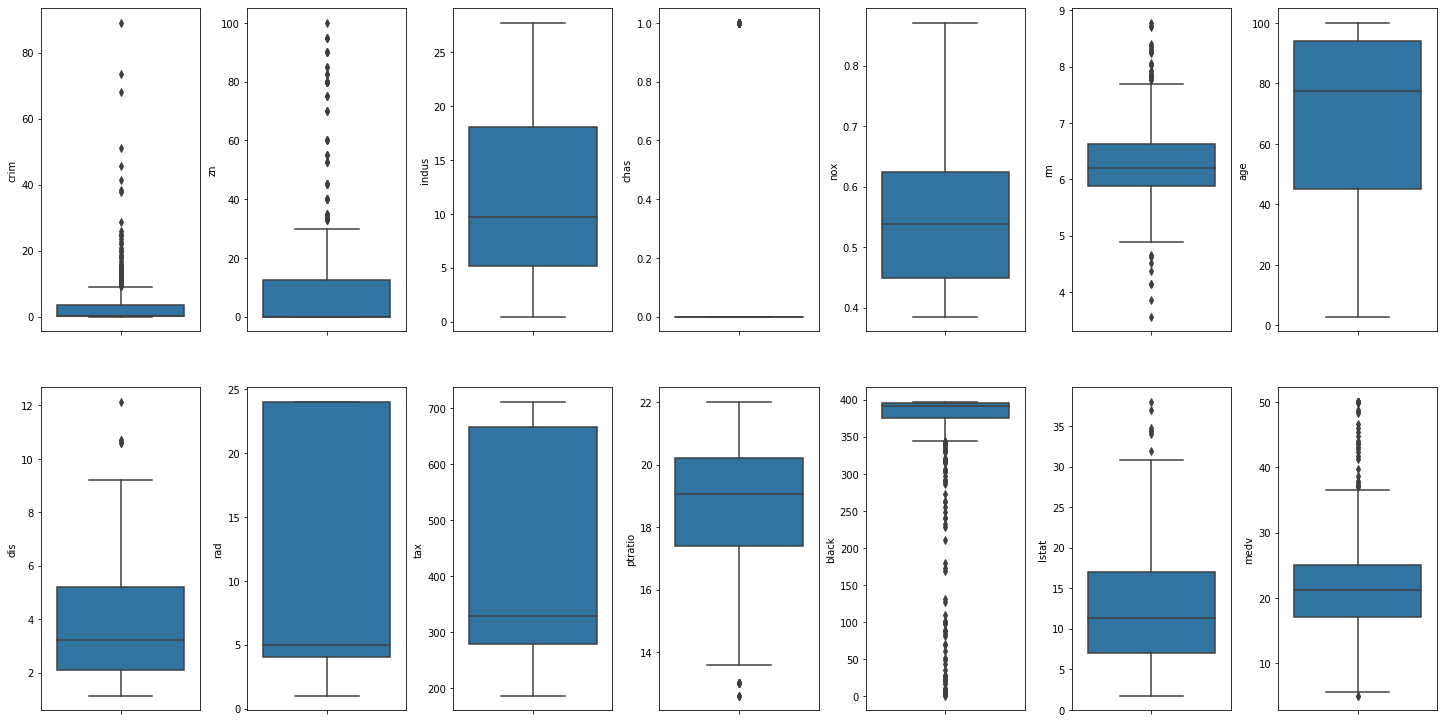

In [63]:
# create box plots
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

## Min-Max Normalization

In [64]:
cols = ['crim', 'zn', 'tax', 'black']
for col in cols:
    # find minimum and maximum of that column
    minimum = min(df[col])
    maximum = max(df[col])
    df[col] = (df[col] - minimum) / (maximum - minimum)

In [71]:
# standardization
from sklearn import preprocessing
scalar = preprocessing.StandardScaler()

# fit our data
scaled_cols = scalar.fit_transform(df[cols])
scaled_cols = pd.DataFrame(scaled_cols, columns=cols)
scaled_cols.head()

,crim,zn,tax,black
0,-0.419782,0.284830,-0.666608,0.441052
1,-0.417339,-0.487722,-0.987329,0.441052
2,-0.417342,-0.487722,-0.987329,0.396427
3,-0.416750,-0.487722,-1.106115,0.416163
4,-0.412482,-0.487722,-1.106115,0.441052


In [72]:
for col in cols:
    df[col] = scaled_cols[col]

## Coorelation Matrix



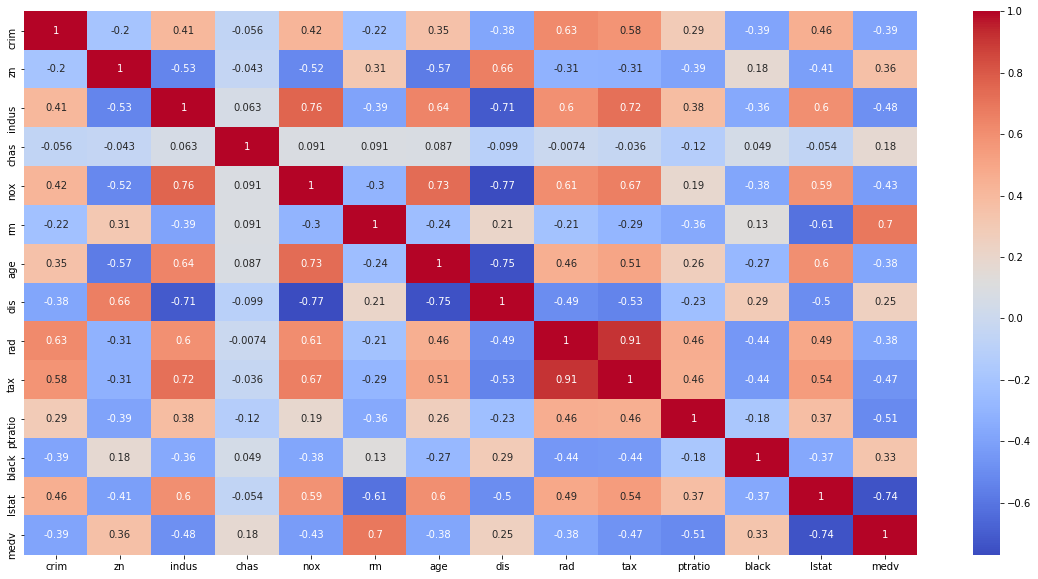

In [73]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

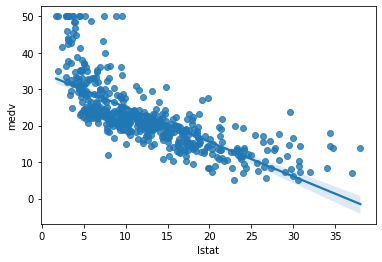

In [74]:
sns.regplot(y=df['medv'], x=df['lstat'])

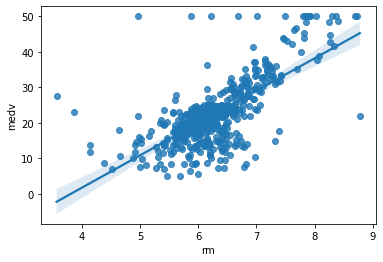

In [75]:
sns.regplot(y=df['medv'], x=df['rm'])

## Input Split

In [76]:
X = df.drop(columns=['medv', 'rad'], axis=1)
y = df['medv']

## Model Training

In [110]:
from sklearn.model_selection import cross_val_score, train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [111]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=False)
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [112]:
lr.score(x_test,y_test)

0.6591178245793918

In [113]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [104]:
dtr.score(x_test,y_test)

0.8210401482893093

In [114]:
dtr.predict(x_train)

array([37.9, 15.6, 45.4, 15.7, 22.6, 14.5, 18.7, 17.8, 16.1, 20.6, 31.6,
       29.1, 15.6, 17.5, 22.5, 19.4, 19.3,  8.5, 20.6, 17. , 17.1, 14.5,
       50. , 14.3, 12.6, 28.7, 21.2, 19.3, 23.1, 19.1, 25. , 33.4,  5. ,
       29.6, 18.7, 21.7, 23.1, 22.8, 21. , 48.8, 14.6, 16.6, 27.1, 20.1,
       19.8, 21. , 41.3, 23.2, 20.4, 18.5, 29.4, 36.4, 24.4, 11.8, 13.8,
       12.3, 17.8, 33.1, 26.7, 13.4, 14.4, 50. , 22. , 19.9, 23.8, 17.5,
       12.7,  5.6, 31.1, 26.2, 19.4, 16.7, 13.8, 22.9, 15.3, 27.5, 36.1,
       22.9, 24.5, 25. , 50. , 34.9, 31.7, 24.1, 22.1, 14.1, 42.8, 19.3,
       32.2, 26.4, 21.8, 21.7,  8.3, 46.7, 43.1, 31.5, 10.5, 16.7, 20. ,
       33.3, 17.8, 50. , 20.5, 23.2, 13.1, 19.6, 22.8, 28.7, 30.7, 22.9,
       21.9, 23.9, 32.7, 24.3, 21.5, 24.6,  8.5, 26.4, 23.1, 15. ,  8.8,
       19.3, 23.9, 24.7, 19.8, 23.8, 13.3, 29. , 27.1, 34.6, 13.3, 15.6,
       12.5, 14.6, 11. , 24.8, 17.3,  8.1, 21.4, 15.6, 23.3, 32. , 38.7,
       30.1, 20.5, 32.5, 42.3, 24.3, 20.6, 22. , 18

In [105]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [102]:
rfr.score(x_test,y_test)

0.85827863915908

In [116]:
rfr.predict(x_train)

array([36.639, 16.025, 45.241, 15.594, 22.749, 15.928, 18.606, 16.676,
       18.035, 20.596, 31.272, 29.004, 16.033, 18.182, 23.46 , 19.505,
       19.15 ,  8.025, 20.913, 17.027, 15.672, 14.504, 48.497, 14.781,
       14.003, 27.011, 20.946, 19.333, 21.772, 17.889, 24.848, 34.224,
        6.532, 26.864, 19.106, 21.256, 23.239, 21.782, 22.089, 47.698,
       14.772, 16.94 , 23.195, 20.249, 19.788, 21.135, 37.857, 21.841,
       20.086, 19.72 , 28.595, 35.774, 24.82 , 12.954, 12.762, 11.474,
       16.728, 32.279, 26.737, 14.245, 14.264, 46.262, 21.744, 20.492,
       23.174, 18.594, 12.354,  6.664, 30.578, 26.448, 19.266, 15.633,
       14.251, 23.089, 17.547, 26.853, 35.368, 22.857, 24.029, 24.091,
       49.367, 33.528, 32.078, 24.058, 22.462, 14.607, 41.267, 19.38 ,
       31.447, 25.304, 21.135, 21.475,  9.497, 45.837, 43.769, 32.437,
        9.493, 16.373, 20.616, 33.747, 16.956, 43.455, 21.164, 23.045,
       12.002, 20.033, 23.97 , 29.756, 29.114, 22.139, 31.827, 25.478,
      